In [1]:
import pandas as pd
import numpy as np
import random 
import math
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 1000, centers = 3, cluster_std = 0.5, n_features = 2)


In [3]:
X

array([[-9.33665096,  0.14862217],
       [ 9.43278366,  9.86999717],
       [-0.06044045, -1.8233584 ],
       ...,
       [-0.46889418, -2.77232644],
       [-8.26201142, -1.10080146],
       [ 9.54668691,  9.71174047]])

In [4]:
x = [i[0] for i in X]
y = [i[1] for i in X]

In [5]:
len(y) , len(x)

(1000, 1000)

In [6]:
points = [(x[i] , y[i]) for i in range(1000)]

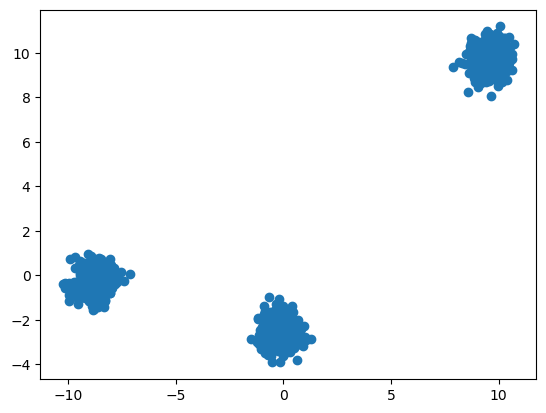

In [7]:
plt.scatter(x , y)

In [8]:
def distance(x_c , y_c , x_p , y_p ):
    return (x_c - x_p)**2 + (y_c - y_p)**2

In [9]:
def kmeans(n_clusters , points  ,  n_epochs = 500 , exhaust = False , display = False):
    cluster_x = [[] for i in range(n_clusters)]
    cluster_y = [[] for i in range(n_clusters)]
    meta_class = []
    if exhaust == False:
        for epoch in range(1 , n_epochs+1):
            if (display == True):
                print("Epoch : " , epoch )
                print(Counter(meta_class))
            if (epoch == 1):
                #First Epoch
                centroids_x = np.array([random.random() for i in range(n_clusters)])
                centroids_y = np.array([random.random() for i in range(n_clusters)])
            else:
                #From Second Epoch onwards , the new centroid is the mean of meta class classification
                centroids_x = [np.mean(clusters) for clusters in cluster_x]
                centroids_y = [np.mean(clusters) for clusters in cluster_y]
                meta_class = []
            for point in points:
                x_c , y_c = point[0] , point[1]
                #print(x_c , y_c)
                distance_from_centroid = []
                for point_index in range(n_clusters):
                    distance_from_centroid.append(distance(x_c , y_c , centroids_x[point_index] , centroids_y[point_index]))
                meta_class.append(distance_from_centroid.index(min(distance_from_centroid)))
            for i in range(len(points)):
                class_ = meta_class[i]
                cluster_x[class_].append(points[i][0])
                cluster_y[class_].append(points[i][1])
        centroids = [[centroids_x[i] , centroids_y[i]] for i in range(n_clusters)]
        return (meta_class , centroids)
            #print(centroids_x)
            #print(centroids_y)

In [10]:
def seperate_classes(classes_ , n_clusters):
    seperated = [[] for i in range(n_clusters)]
    index = 0
    for i in classes_:
        seperated[i].append(index)
        index+=1
    return seperated

In [11]:
def wcss(n_clusters , seperated , centroids):
    wcss = 0
    for i in range(n_clusters):
        xc = centroids[i][0]
        yc = centroids[i][1]
        point_ind = seperated[i]
        for j in point_ind:
            xp = points[j][0]
            yp = points[j][1]
            wcss+=distance(xc , yc , xp , yp)
    return wcss

In [12]:
def optimal_clusters(max_clusters = 10):
    WCSS = []
    for i in range(2 , max_clusters+1):
        classes_ , centroids = kmeans(i , points )
        wc = wcss(i , seperate_classes(classes_ , i) , centroids)
        WCSS.append(wc)
    return WCSS


In [ ]:
wcss_ = optimal_clusters()

In [ ]:
wcss_

In [ ]:
plt.plot(range(2,11),wcss_)

In [ ]:
optimal_cluster = 3


In [ ]:
class_ , centroids = kmeans(optimal_cluster , points)


In [ ]:
c1_x = []
c1_y = []
c2_x = []
c2_y = []
c3_x = []
c3_y = []
ind = 0
for i in class_:
    if i == 0:
        c1_x.append(points[ind][0])
        c1_y.append(points[ind][1])
    elif i ==1:
        c2_x.append(points[ind][0])
        c2_y.append(points[ind][1])
    elif i==2:
        c3_x.append(points[ind][0])
        c3_y.append(points[ind][1])
    ind+=1

In [ ]:
plt.scatter(c1_x , c1_y , c = 'red')
plt.scatter(c2_x , c2_y , c = 'blue')
plt.scatter(c3_x , c3_y , c = 'green')
plt.plot(centroids[0][0], centroids[0][1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")
plt.plot(centroids[1][0], centroids[1][1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")
plt.plot(centroids[2][0], centroids[2][1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")